In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

## Training Image Preprocessing

In [59]:
train_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5216 files belonging to 2 classes.


In [60]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 16 files belonging to 2 classes.


In [61]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 16 files belonging to 2 classes.


In [62]:
print(len(train_set))
print(len(validation_set))
print(len(test_set))

163
1
1


In [63]:
class_names = train_set.class_names + validation_set.class_names + test_set.class_names

In [64]:
combined_set = train_set.concatenate(validation_set).concatenate(test_set)

In [65]:
len(combined_set)

165

In [66]:
split = int(0.8*(len(combined_set)))
train_set = combined_set.take(split)
test_set = combined_set.skip(split)

In [67]:
print(len(train_set))
print(len(test_set))

132
33


In [68]:
train_set

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [69]:
for x,y in train_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[3.73906250e+01 3.73906250e+01 3.73906250e+01]
   [4.16635742e+01 4.16635742e+01 4.16635742e+01]
   [4.39809570e+01 4.39809570e+01 4.39809570e+01]
   ...
   [5.65312500e+01 5.65312500e+01 5.65312500e+01]
   [4.87656250e+01 4.87656250e+01 4.87656250e+01]
   [4.65937500e+01 4.65937500e+01 4.65937500e+01]]

  [[3.88666992e+01 3.88666992e+01 3.88666992e+01]
   [4.29531250e+01 4.29531250e+01 4.29531250e+01]
   [4.57343750e+01 4.57343750e+01 4.57343750e+01]
   ...
   [5.10366211e+01 5.10366211e+01 5.10366211e+01]
   [5.19531250e+01 5.19531250e+01 5.19531250e+01]
   [4.95625000e+01 4.95625000e+01 4.95625000e+01]]

  [[4.03593750e+01 4.03593750e+01 4.03593750e+01]
   [4.41718750e+01 4.41718750e+01 4.41718750e+01]
   [4.69687500e+01 4.69687500e+01 4.69687500e+01]
   ...
   [5.69545898e+01 5.69545898e+01 5.69545898e+01]
   [5.31718750e+01 5.31718750e+01 5.31718750e+01]
   [5.10000000e+01 5.10000000e+01 5.10000000e+01]]

  ...

  [[1.90000000e+01 1.90000000e+01 1.90000000e+01]
   [1

# To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

# Building Model

In [70]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [71]:
model = Sequential()

In [72]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=3))

In [73]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [74]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [75]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [76]:
model.add(Flatten())

In [77]:
model.add(Dense(units=512,activation='relu'))

In [78]:
model.add(Dense(units=2,activation='softmax'))

# Compiling Model

In [79]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 85, 85, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 85, 85, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 83, 83, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 41, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 41, 41, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 39, 39, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 19, 19, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 92416)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      47,317,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,463,938 (184.88 MB)

 Trainable params: 48,463,938 (184.88 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
training_history = model.fit(x=train_set,epochs=10)

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 22s 123ms/step - accuracy: 0.7729 - loss: 2.6756
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.9632 - loss: 0.0951
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9795 - loss: 0.0644
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.9752 - loss: 0.0641
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9849 - loss: 0.0497
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.9869 - loss: 0.0370
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9808 - loss: 0.0433
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.9842 - loss: 0.0355
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.9947 - loss: 0.0152
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.9982 - loss: 0.0099


# Model Evaluation

In [82]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(train_set)

132/132 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9965 - loss: 0.0083


In [83]:
print(train_loss,train_acc*100)

0.006396847777068615 99.8106062412262


In [84]:
#Model on Test set
test_loss,test_acc = model.evaluate(test_set)

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.9794 - loss: 0.1058


In [85]:
print(test_loss,test_acc*100)

0.09375335276126862 97.94921875


# Saving Model

In [86]:
model.save("trained_model.keras")

In [87]:
training_history.history

{'accuracy': [0.8776041865348816,
  0.9678030014038086,
  0.9786931872367859,
  0.9803503751754761,
  0.9857954382896423,
  0.9874526262283325,
  0.9869791865348816,
  0.9869791865348816,
  0.9945549368858337,
  0.9983428120613098],
 'loss': [0.825252890586853,
  0.08754879236221313,
  0.0625438466668129,
  0.05637048929929733,
  0.042295560240745544,
  0.036399487406015396,
  0.03323239088058472,
  0.032608140259981155,
  0.013891325332224369,
  0.008548754267394543]}

In [88]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [89]:
########################################################################################################
########################################################################################################
########################################################################################################

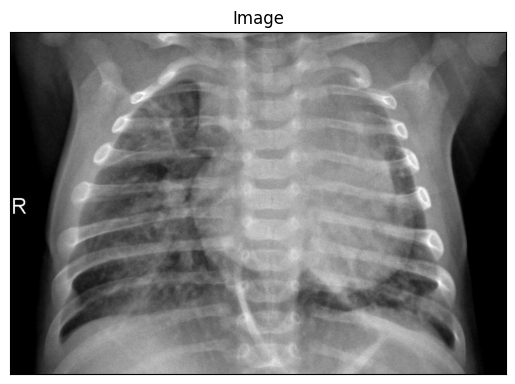

In [90]:
import cv2

image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [91]:
import numpy as np

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 256, 256, 3)


In [92]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


(array([[6.4352906e-07, 9.9999940e-01]], dtype=float32), (1, 2))

In [93]:
print(type(validation_set))
print(type(combined_set))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.concatenate_op._ConcatenateDataset'>


In [104]:
class_names = list(set(class_names))

In [105]:
print(class_names)

['NORMAL', 'PNEUMONIA']


In [106]:
result_index = np.argmax(prediction)
print(result_index)

1


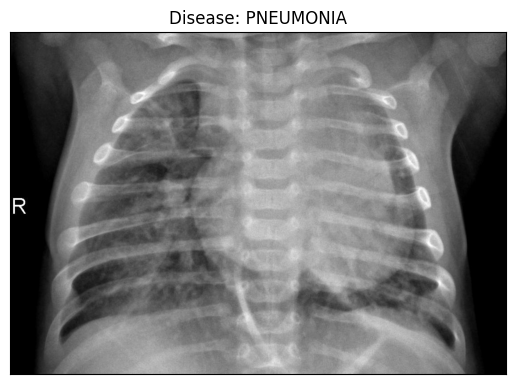

In [108]:
model_prediction = class_names[result_index]

plt.imshow(img)
plt.title(f"Disease: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()